In [11]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt

import os
import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
from importlib import reload

import Tree
reload(Tree)
from Tree import *

import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

import utils
reload(utils)
from utils import *

import main
reload(main)
from main import *


path='c:\\Users\\31683\\Desktop\\data\\M5'
Y_path=path+f"\\sales_train_validation.pkl"  # to data file 
Y_path_eval=path+f"\\sales_train_evaluation.pkl" 
X_path_val_eval=path+f"\\prices_train_val_eval.pkl"  # to data file
dfHolidays=pd.read_csv(path+f"\\holidays.csv")
data=pd.read_pickle(Y_path)
iOoS=28


In [16]:
vW=np.loadtxt(os.getcwd()+f"\\data\\M5\\weights.txt")[:114]
vW

array([3.748180e+06, 1.658087e+06, 1.009372e+06, 1.080720e+06,
       4.156290e+05, 4.132230e+05, 5.833220e+05, 2.459110e+05,
       2.907100e+05, 3.568310e+05, 3.618290e+05, 3.265310e+05,
       4.371180e+05, 3.170700e+05, 2.322390e+05, 6.675300e+04,
       1.166360e+05, 2.261700e+05, 4.600800e+04, 1.410450e+05,
       3.056010e+05, 6.831000e+04, 2.094110e+05, 1.383430e+05,
       3.952500e+04, 6.804300e+04, 1.545660e+05, 3.373100e+04,
       1.024130e+05, 1.893220e+05, 5.433700e+04, 1.131720e+05,
       1.867900e+05, 6.670600e+04, 1.083320e+05, 1.989690e+05,
       4.361500e+04, 8.394600e+04, 2.962150e+05, 3.208000e+04,
       1.088210e+05, 2.029430e+05, 2.899400e+04, 8.513200e+04,
       1.952200e+04, 5.572500e+04, 1.569900e+05, 6.449600e+04,
       2.257000e+03, 8.534300e+04, 3.129200e+04, 3.667300e+04,
       4.882300e+04, 1.406730e+05, 4.359100e+04, 2.417000e+03,
       9.596300e+04, 4.508100e+04, 2.951200e+04, 7.389700e+04,
       2.021910e+05, 6.502000e+04, 3.289000e+03, 1.6380

In [3]:
df=data[data.columns[data.columns.isin(['state_id','cat_id','dept_id','store_id','2011-12-25', '2012-12-25', '2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'])]]
df.groupby(['state_id','store_id']).sum()


cat_id  dept_id  \
state_id store_id                                                             
CA       1         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   
         2         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   
         3         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   
         4         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   
TX       1         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   
         2         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   
         3         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   
WI       1         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   
         2         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   
         3         FOODSFOODSFOODSHOBBIESHOBBIESHOUSEHOLDHOUSEHOLD       12   

                   2011-12-25  2012-12-25  2013-12-25  2014-12-25  2015-12-25  
state_id store_id                                                              
CA       1                  0           0           0           0           0  
         2                  7           2           2           6           2  
         3                  1           4           3           0           4  
         4                  0           0           0           0           0  
TX       1                  0           0           1           0           1  
         2                  0           0          11           7           0  
         3                  2           2           1           6           3  
WI       1                  0           0           1           0           2  
         2                  3           3           0           0           1  
         3                  0           0           1           1           1

In [36]:
melted_data=pd.melt(data, id_vars=['state_id','store_id','cat_id','dept_id'],value_name='Value')
melted_data=melted_data.groupby(['state_id','store_id','cat_id','dept_id'], as_index=False)['Value'].mean()
melted_data['Total']='Total'
melted_data['Value']=np.round(melted_data['Value'],1)
melted_data.rename(columns={'state_id':'State','store_id':'Store','cat_id':'Category','dept_id':'Department'},inplace=True)
fig = px.treemap(melted_data, path=['Total', 'State', 'Store', 'Category', ], values='Value',
                  color='Value',
                  color_continuous_scale= px.colors.sequential.Sunset,
                  title='Walmart: Mean distribution of historical sales')
fig.update_layout(template='seaborn')
fig.show()

In [5]:
data

,state_id,store_id,cat_id,dept_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,CA,1,FOODS,1,297,284,214,175,182,191,...,293,317,268,302,237,287,297,331,419,329
1,CA,1,FOODS,2,674,655,396,476,354,486,...,435,499,637,529,391,423,365,489,590,734
2,CA,1,FOODS,3,2268,2198,1398,1607,1496,1730,...,1978,2665,3099,2055,1860,1780,1871,2140,2646,2990
3,CA,1,HOBBIES,1,528,489,409,383,263,453,...,370,690,597,517,461,333,380,471,621,641
4,CA,1,HOBBIES,2,28,9,6,9,5,14,...,31,32,58,25,34,30,30,56,49,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,WI,3,FOODS,3,2293,2383,1841,1965,1427,2760,...,2534,2659,2449,1991,1715,1579,1670,1897,2411,2233
66,WI,3,HOBBIES,1,256,342,228,183,70,285,...,304,376,200,149,249,202,182,264,381,230
67,WI,3,HOBBIES,2,22,14,20,11,4,8,...,44,35,51,25,27,42,21,32,32,21
68,WI,3,HOUSEHOLD,1,584,541,420,327,151,392,...,676,708,802,609,558,535,573,701,801,766


In [4]:
df=data.iloc[:,4:].T
df['mean']=df.mean(axis=1)
df['sum']=df.sum(axis=1)
df=df[['mean','sum']]
df.index = pd.to_datetime(df.index)
df

,mean,sum
2011-01-29,466.157143,33097.157143
2011-01-30,453.557143,32202.557143
2011-01-31,339.757143,24122.757143
2011-02-01,363.028571,25775.028571
2011-02-02,273.514286,19419.514286
...,...,...
2016-04-20,504.900000,35847.900000
2016-04-21,500.471429,35533.471429
2016-04-22,578.814286,41095.814286
2016-04-23,699.457143,49661.457143


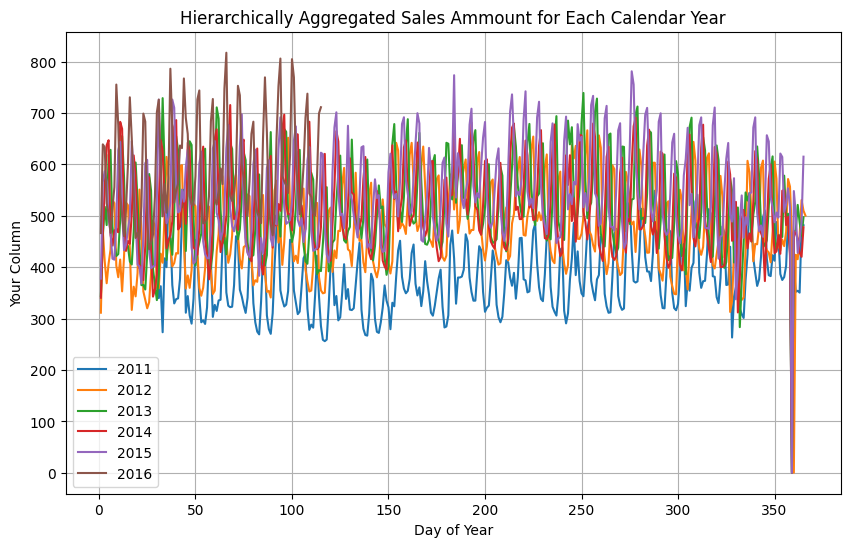

In [30]:
grouped = df.groupby(df.index.year)['mean']

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot each group (year) separately
for year, group in grouped:
    plt.plot(group.index.dayofyear, group, label=str(year))

# Customize the plot
plt.xlabel('Day of Year')
plt.ylabel('Your Column')
plt.title('Total Sales Ammount for Each Calendar Year')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


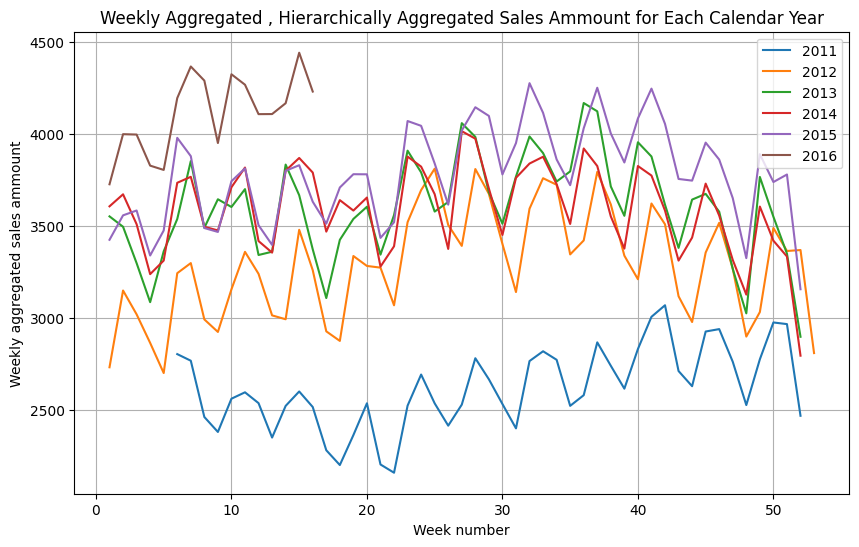

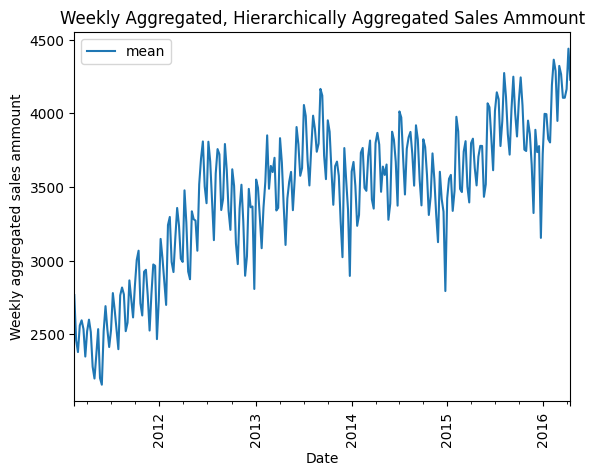

In [31]:
weekly_df = df.resample('W').sum()['mean']
weekly_df=weekly_df[1:-1]
# Group the resampled DataFrame by year
grouped = weekly_df.groupby(weekly_df.index.year)

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot each group (year) separately
for year, group in grouped:
    week_number = group.index.strftime('%U').astype(int)  # Convert week number to integer
    plt.plot(week_number, group, label=str(year))

# Customize the plot
plt.xlabel('Week number')
plt.ylabel('Weekly aggregated sales ammount')
plt.title('Weekly Mean total sales ammount for each calendar year, for all Walmart stores ')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


weekly_df[1:].plot()
plt.xlabel('Date')
plt.ylabel('Weekly aggregated sales ammount')
plt.title('Weekly mean total sales ammount for all Walmart stores')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [90]:
data

,state_id,store_id,cat_id,dept_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,CA,1,FOODS,1,297,284,214,175,182,191,...,293,317,268,302,237,287,297,331,419,329
1,CA,1,FOODS,2,674,655,396,476,354,486,...,435,499,637,529,391,423,365,489,590,734
2,CA,1,FOODS,3,2268,2198,1398,1607,1496,1730,...,1978,2665,3099,2055,1860,1780,1871,2140,2646,2990
3,CA,1,HOBBIES,1,528,489,409,383,263,453,...,370,690,597,517,461,333,380,471,621,641
4,CA,1,HOBBIES,2,28,9,6,9,5,14,...,31,32,58,25,34,30,30,56,49,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,WI,3,FOODS,3,2293,2383,1841,1965,1427,2760,...,2534,2659,2449,1991,1715,1579,1670,1897,2411,2233
66,WI,3,HOBBIES,1,256,342,228,183,70,285,...,304,376,200,149,249,202,182,264,381,230
67,WI,3,HOBBIES,2,22,14,20,11,4,8,...,44,35,51,25,27,42,21,32,32,21
68,WI,3,HOUSEHOLD,1,584,541,420,327,151,392,...,676,708,802,609,558,535,573,701,801,766


In [170]:
overal_avg=df.drop(columns=['DoW','date','month']).mean(axis=0)
monhtly_avg=df.drop(columns=['DoW','date']).groupby('month').mean()
seasonality_index=monhtly_avg/overal_avg
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
seasonality_index.index = pd.CategoricalIndex(seasonality_index.index, categories=month_order, ordered=True)
seasonality_index.sort_index(inplace=True)
seasonality_index

,Total,CA,TX,WI,FOODS,HOBBIES,HOUSEHOLD
month,,,,,,,
January,0.985172,0.975352,0.952526,1.034760,0.997206,0.980087,0.949850
February,1.008825,0.976051,1.003520,1.066222,1.001224,1.027305,1.024678
March,0.999950,0.988897,0.997599,1.019893,0.993062,1.005754,1.018941
April,0.997587,1.000615,1.001083,0.989148,0.990950,1.034653,1.002575
May,0.946487,0.955795,0.969731,0.907517,0.946440,0.986376,0.929764
June,1.019214,1.031438,1.037868,0.980415,1.025747,1.034214,0.992529
July,1.022738,1.037239,1.033804,0.988249,1.030757,0.995373,1.009344
August,1.046739,1.064640,1.065307,0.999046,1.048100,0.973354,1.073539
September,1.033129,1.051149,1.031939,1.005854,1.034299,0.945312,1.066629


In [171]:
seasonality_index / seasonality_index.sum() * len(seasonality_index)

,Total,CA,TX,WI,FOODS,HOBBIES,HOUSEHOLD
month,,,,,,,
January,0.985136,0.974834,0.952394,1.035642,0.996938,0.980796,0.950198
February,1.008788,0.975534,1.003381,1.067131,1.000955,1.028048,1.025053
March,0.999913,0.988372,0.997461,1.020761,0.992795,1.006482,1.019314
April,0.997550,1.000084,1.000945,0.989990,0.990683,1.035402,1.002941
May,0.946453,0.955288,0.969596,0.908290,0.946185,0.987089,0.930104
June,1.019177,1.030892,1.037724,0.981251,1.025471,1.034962,0.992892
July,1.022700,1.036689,1.033661,0.989091,1.030479,0.996093,1.009713
August,1.046700,1.064075,1.065159,0.999897,1.047818,0.974058,1.073932
September,1.033091,1.050591,1.031796,1.006711,1.034021,0.945996,1.067019


In [153]:
overal_avg

Total        34341.562467
CA           14989.831155
TX            9879.250392
WI            9472.480920
FOODS        23570.276529
HOBBIES       3201.672765
HOUSEHOLD     7569.613173
dtype: float64

Text(0, 0.5, 'Seasonality Index')

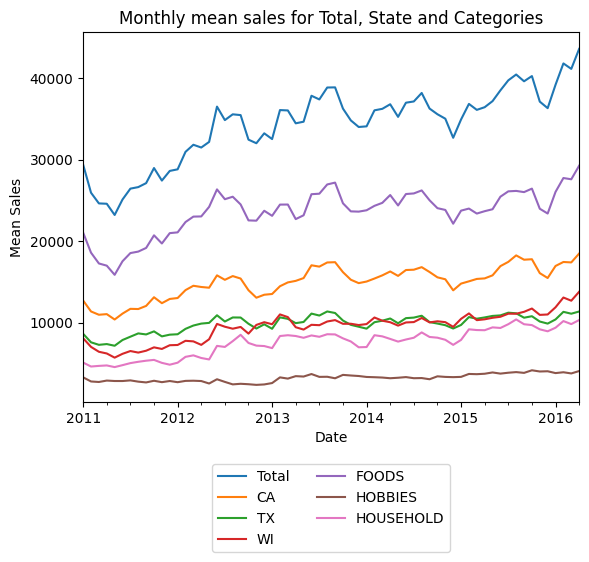

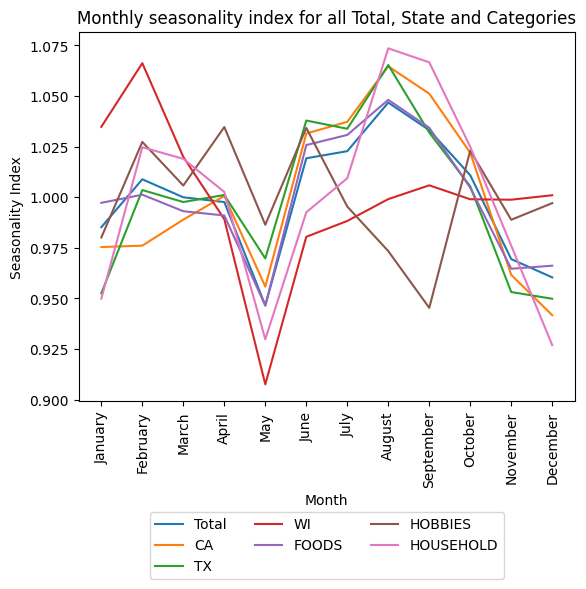

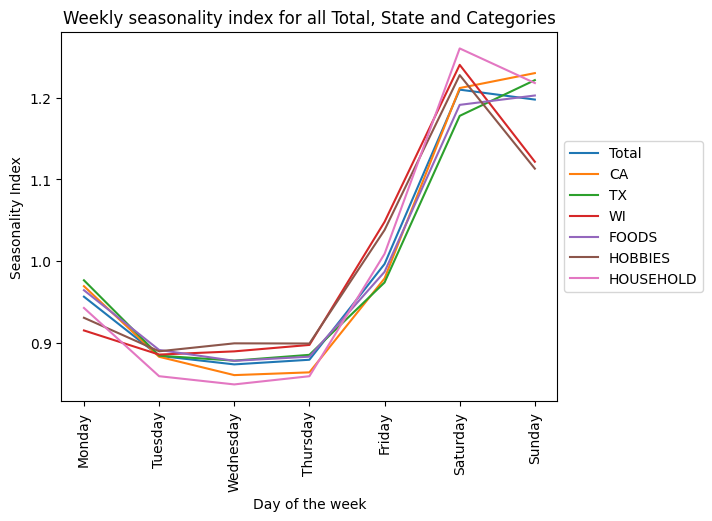

In [196]:
mTotal=data.sum(axis=0,numeric_only=True)[2:].to_numpy()
mCat=data.groupby(['cat_id'], as_index=False).sum().iloc[:,4:].to_numpy()
mState=data.groupby(['state_id'], as_index=False).sum().iloc[:,4:].to_numpy()
mData=np.vstack((mTotal,mState,mCat)).T
df=pd.DataFrame(data=mData, index=pd.to_datetime(data.columns[4:]) , columns=['Total','CA', 'TX', 'WI', 'FOODS' , 'HOBBIES', 'HOUSEHOLD' ])
df

ax = df.resample('M').mean().plot()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
ax.set_title('Monthly mean sales for Total, State and Categories')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Sales')

df=df.reset_index().rename(columns={'index': 'date'})
df['date'] = pd.to_datetime(df['date'])
df['month']=df['date'].dt.month_name()
df['DoW']=df['date'].dt.day_name()

overal_avg=df.drop(columns=['DoW','date','month']).mean(axis=0)
monhtly_avg=df.drop(columns=['DoW','date']).groupby('month').mean()
seasonality_index=monhtly_avg/overal_avg
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
seasonality_index.index = pd.CategoricalIndex(seasonality_index.index, categories=month_order, ordered=True)
seasonality_index.sort_index(inplace=True)


ax = seasonality_index.plot()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3)
ax.set_xticks(range(len(seasonality_index.index)))
ax.set_xticklabels(seasonality_index.index, rotation=90) 
ax.set_title('Monthly seasonality index for all Total, State and Categories')
ax.set_xlabel('Month')
ax.set_ylabel('Seasonality Index')


monhtly_avg=df.drop(columns=['month','date']).groupby('DoW').mean()
seasonality_index=monhtly_avg/overal_avg
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seasonality_index.index = pd.CategoricalIndex(seasonality_index.index, categories=dow_order, ordered=True)
seasonality_index.sort_index(inplace=True)


ax = seasonality_index.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(range(len(seasonality_index.index)))
ax.set_xticklabels(seasonality_index.index, rotation=90) 
ax.set_title('Weekly seasonality index for all Total, State and Categories')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Seasonality Index')

C:\Users\31683\AppData\Local\Temp\ipykernel_15836\4147567076.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = data.groupby(['cat_id', 'dept_id'], as_index=False).sum()
C:\Users\31683\AppData\Local\Temp\ipykernel_15836\4147567076.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df = data.groupby(['cat_id', 'dept_id'], as_index=False).sum()


Text(0, 0.5, 'Seasonality Index')

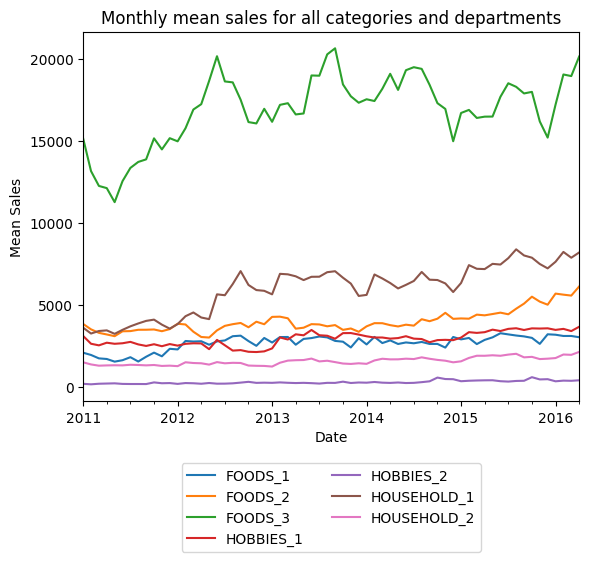

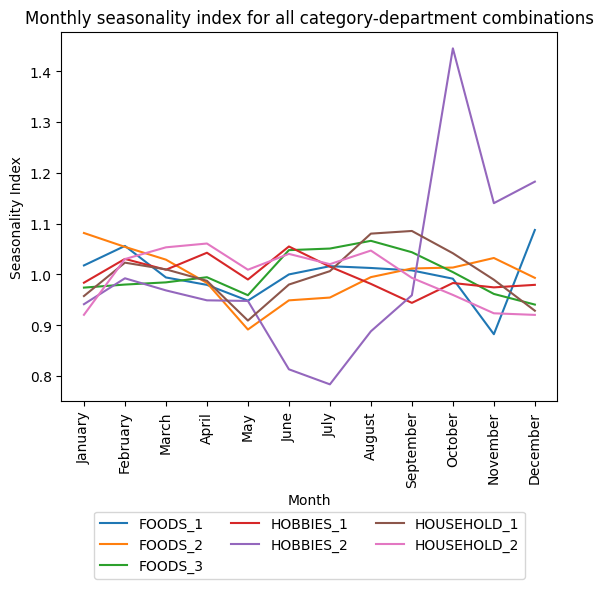

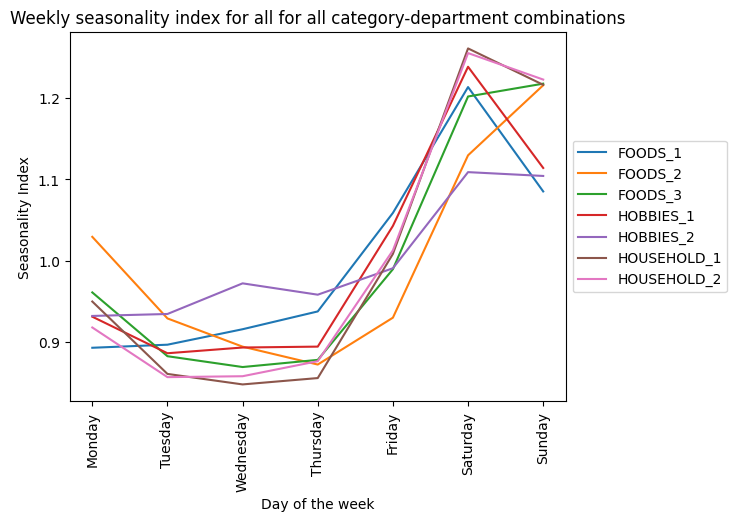

In [198]:
df = data.groupby(['cat_id', 'dept_id'], as_index=False).sum()
df['cat_dept']=df['cat_id']+str("_")+df['dept_id'].astype(str)
df.set_index('cat_dept',inplace=True)
df=df.T.iloc[4:,:]
df.index = pd.to_datetime(df.index)


ax = df.resample('M').mean().plot()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
ax.set_title('Monthly mean sales for all categories and departments')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Sales')


df=df.reset_index().rename(columns={'index': 'date'})
df['date'] = pd.to_datetime(df['date'])
df['month']=df['date'].dt.month_name()
df['DoW']=df['date'].dt.day_name()

overal_avg=df.drop(columns=['DoW','date','month']).mean(axis=0)
monhtly_avg=df.drop(columns=['DoW','date']).groupby('month').mean()
seasonality_index=monhtly_avg/overal_avg
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
seasonality_index.index = pd.CategoricalIndex(seasonality_index.index, categories=month_order, ordered=True)
seasonality_index.sort_index(inplace=True)

ax = seasonality_index.plot()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3)
ax.set_xticks(range(len(seasonality_index.index)))
ax.set_xticklabels(seasonality_index.index, rotation=90) 
ax.set_title('Monthly seasonality index for all category-department combinations')
ax.set_xlabel('Month')
ax.set_ylabel('Seasonality Index')


monhtly_avg=df.drop(columns=['month','date']).groupby('DoW').mean()
seasonality_index=monhtly_avg/overal_avg
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seasonality_index.index = pd.CategoricalIndex(seasonality_index.index, categories=dow_order, ordered=True)
seasonality_index.sort_index(inplace=True)


ax = seasonality_index.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(range(len(seasonality_index.index)))
ax.set_xticklabels(seasonality_index.index, rotation=90) 
ax.set_title('Weekly seasonality index for all for all category-department combinations')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Seasonality Index')

Text(0, 0.5, 'Seasonality Index')

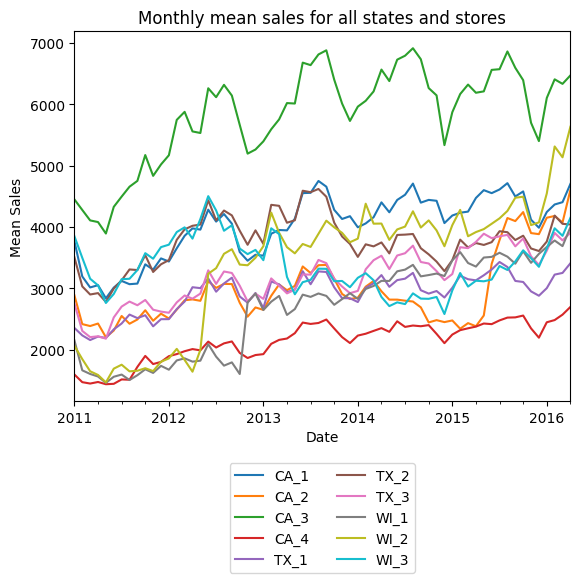

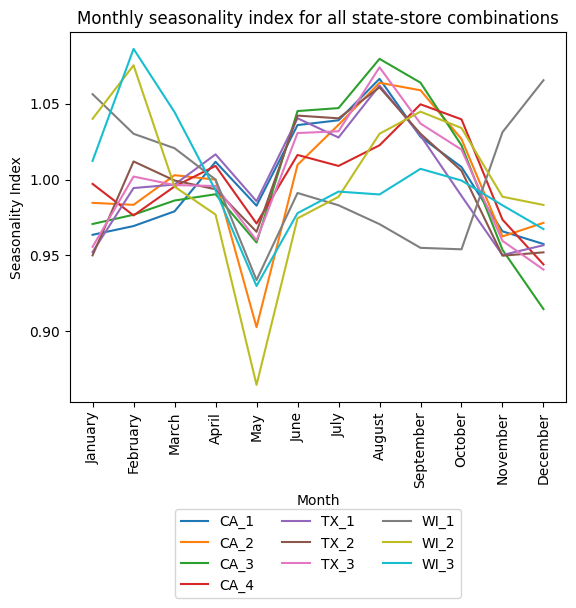

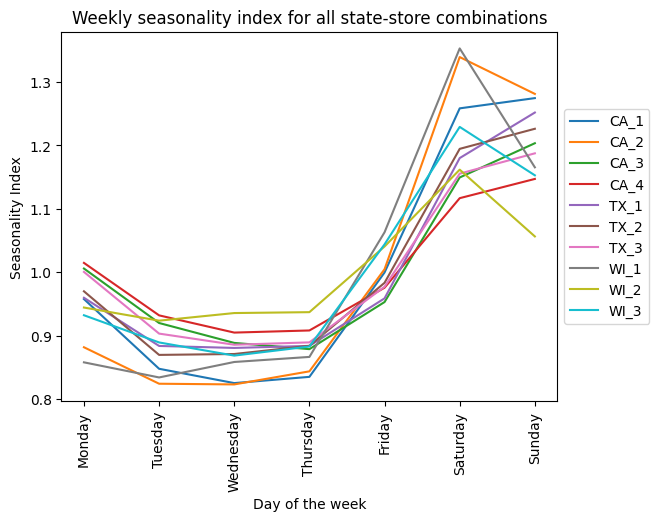

In [201]:
df = data.groupby(['state_id', 'store_id'], as_index=False).sum()
df['state_store']=df['state_id']+str("_")+df['store_id'].astype(str)
df.set_index('state_store',inplace=True)
df=df.T.iloc[4:,:]
df.index = pd.to_datetime(df.index)


ax = df.resample('M').mean().plot()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
ax.set_title('Monthly mean sales for all states and stores')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Sales')


df=df.reset_index().rename(columns={'index': 'date'})
df['date'] = pd.to_datetime(df['date'])
df['month']=df['date'].dt.month_name()
df['DoW']=df['date'].dt.day_name()

overal_avg=df.drop(columns=['DoW','date','month']).mean(axis=0)
monhtly_avg=df.drop(columns=['DoW','date']).groupby('month').mean()
seasonality_index=monhtly_avg/overal_avg
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
seasonality_index.index = pd.CategoricalIndex(seasonality_index.index, categories=month_order, ordered=True)
seasonality_index.sort_index(inplace=True)



ax = seasonality_index.plot()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), ncol=3)
ax.set_xticks(range(len(seasonality_index.index)))
ax.set_xticklabels(seasonality_index.index, rotation=90) 
ax.set_title('Monthly seasonality index for all state-store combinations')
ax.set_xlabel('Month')
ax.set_ylabel('Seasonality Index')

monhtly_avg=df.drop(columns=['month','date']).groupby('DoW').mean()
seasonality_index=monhtly_avg/overal_avg
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seasonality_index.index = pd.CategoricalIndex(seasonality_index.index, categories=dow_order, ordered=True)
seasonality_index.sort_index(inplace=True)


ax = seasonality_index.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(range(len(seasonality_index.index)))
ax.set_xticklabels(seasonality_index.index, rotation=90) 
ax.set_title('Weekly seasonality index for all state-store combinations')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Seasonality Index')



Text(0, 0.5, 'Seasonality Index')

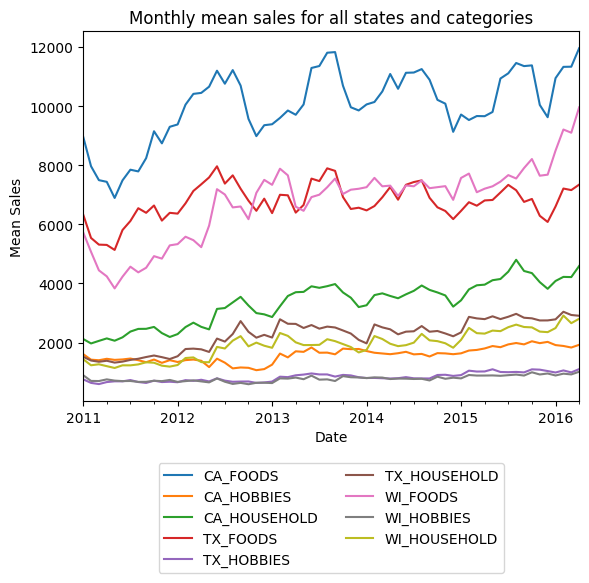

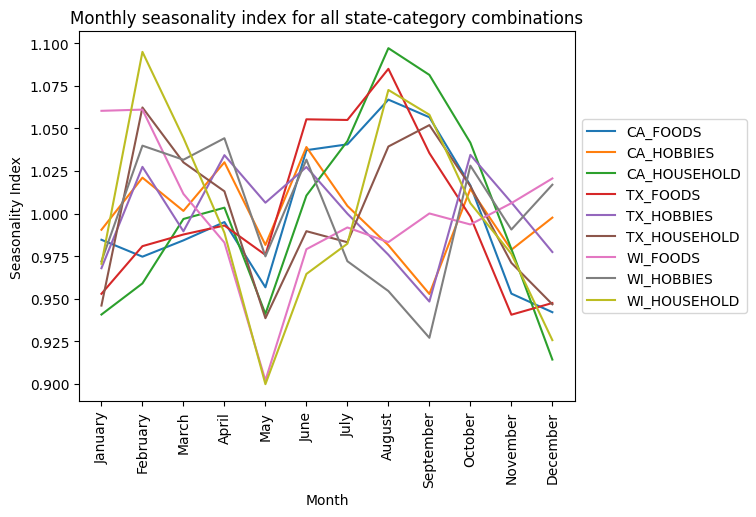

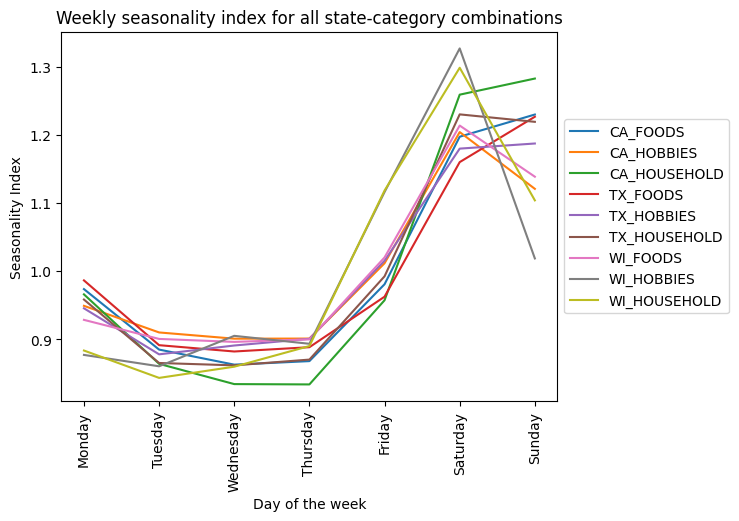

In [182]:
df = data.groupby(['state_id', 'cat_id'], as_index=False).sum()
df['state_cat']=df['state_id']+str("_")+df['cat_id'].astype(str)
df.set_index('state_cat',inplace=True)
df=df.T.iloc[4:,:]
df.index = pd.to_datetime(df.index)


ax = df.resample('M').mean().plot()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
ax.set_title('Monthly mean sales for all states and categories')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Sales')


df=df.reset_index().rename(columns={'index': 'date'})
df['date'] = pd.to_datetime(df['date'])
df['month']=df['date'].dt.month_name()
df['DoW']=df['date'].dt.day_name()

overal_avg=df.drop(columns=['DoW','date','month']).mean(axis=0)
monhtly_avg=df.drop(columns=['DoW','date']).groupby('month').mean()
seasonality_index=monhtly_avg/overal_avg
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
seasonality_index.index = pd.CategoricalIndex(seasonality_index.index, categories=month_order, ordered=True)
seasonality_index.sort_index(inplace=True)

ax = seasonality_index.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(range(len(seasonality_index.index)))
ax.set_xticklabels(seasonality_index.index, rotation=90) 
ax.set_title('Monthly seasonality index for all state-category combinations')
ax.set_xlabel('Month')
ax.set_ylabel('Seasonality Index')


monhtly_avg=df.drop(columns=['month','date']).groupby('DoW').mean()
seasonality_index=monhtly_avg/overal_avg
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
seasonality_index.index = pd.CategoricalIndex(seasonality_index.index, categories=dow_order, ordered=True)
seasonality_index.sort_index(inplace=True)


ax = seasonality_index.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticks(range(len(seasonality_index.index)))
ax.set_xticklabels(seasonality_index.index, rotation=90) 
ax.set_title('Weekly seasonality index for all state-category combinations')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Seasonality Index')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df = data.groupby(['state_id', 'store_id', 'cat_id'], as_index=False).sum()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

for i in range(1, 5):  # Loop through stores 1 to 4
    ax = axs[(i-1) // 2, (i-1) % 2]  # Get the correct subplot location
    filtered_df = df[(df.state_id == 'CA') & (df.store_id == i) & (df.cat_id == 'HOUSEHOLD')]
    
    # Transpose, drop first 4 rows, and reset index
    filtered_df = filtered_df.T
    filtered_df = filtered_df.iloc[4:].reset_index()
    filtered_df.columns = ['Date', 'sales_amount']
    
    # Convert 'Date' to datetime format
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
    
    ax.plot(filtered_df['Date'], filtered_df['sales_amount'])  # Plot data
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily sales amount')
    ax.set_title(f'Daily sales amount for HOUSEHOLD department in store {i} in CA')
    
    # Set x-axis major formatter to show only the year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    ax.legend(['Sales Amount'])
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()  # Adjust spacing between plots
plt.show()


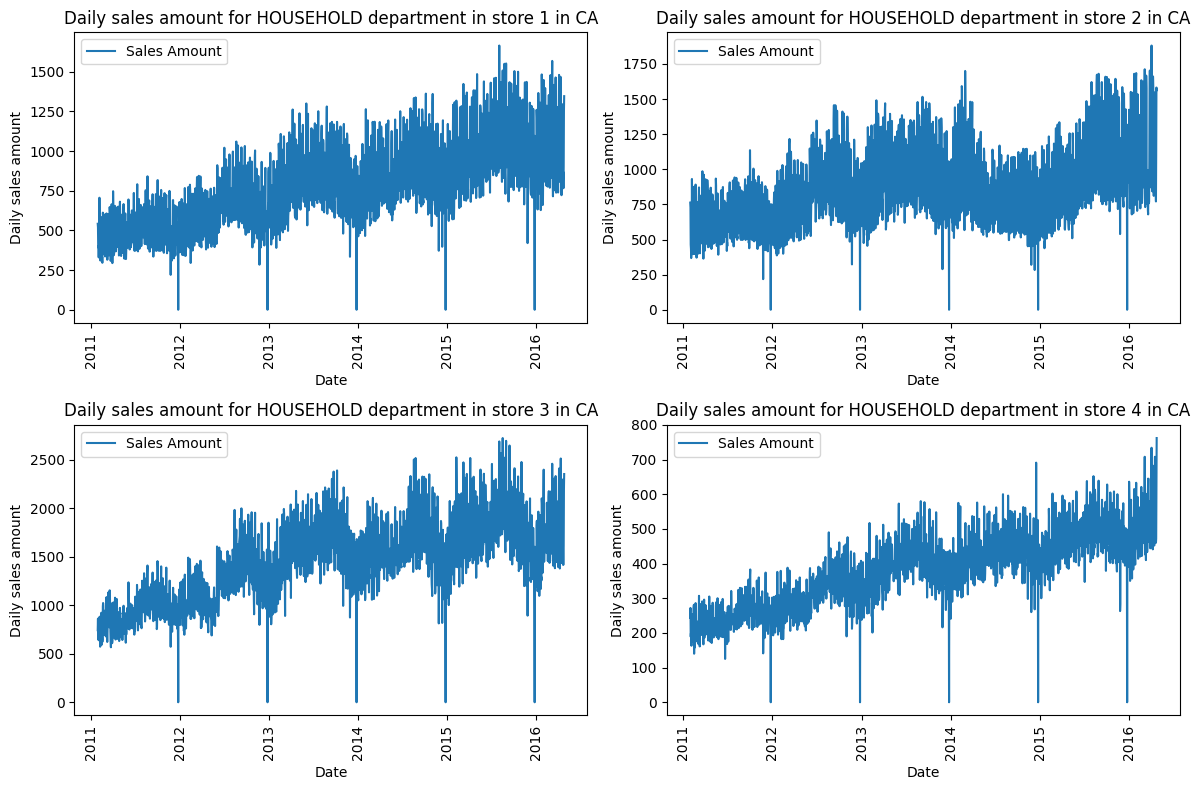

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df = data.groupby(['state_id', 'store_id', 'cat_id'], as_index=False).sum()

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid of subplots

for i in range(1, 5):  # Loop through stores 1 to 4
    ax = axs[(i-1) // 2, (i-1) % 2]  # Get the correct subplot location
    filtered_df = df[(df.state_id == 'CA') & (df.store_id == i) & (df.cat_id == 'HOUSEHOLD')]
    
    # Transpose, drop first 4 rows, and reset index
    filtered_df = filtered_df.T
    filtered_df = filtered_df.iloc[4:].reset_index()
    filtered_df.columns = ['Date', 'sales_amount']
    
    # Convert 'Date' to datetime format
    filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
    
    ax.plot(filtered_df['Date'], filtered_df['sales_amount'])  # Plot data
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily sales amount')
    ax.set_title(f'Daily sales amount for HOUSEHOLD department in store {i} in CA')
    
    # Set x-axis major formatter to show only the year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    
    ax.legend(['Sales Amount'])
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()  # Adjust spacing between plots
plt.show()


In [12]:
tree=Tree(data=data, type='spatial')

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:121: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Prices

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import os 
import numpy as np

In [2]:
prices_train_val_eval = pd.read_csv(os.getcwd()+ "\\data\\M5\\prices_train_val_eval.csv")

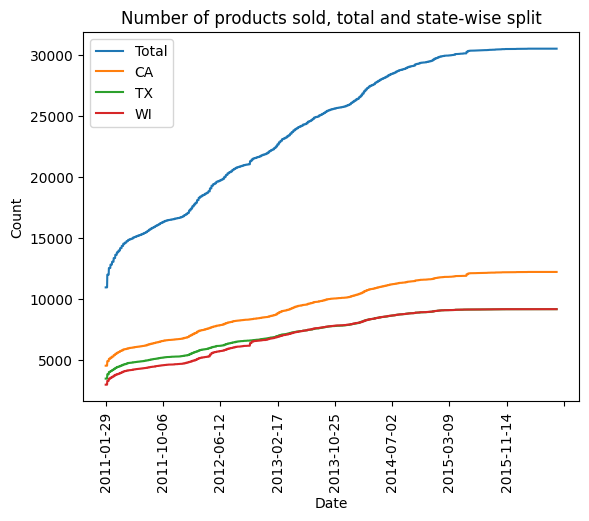

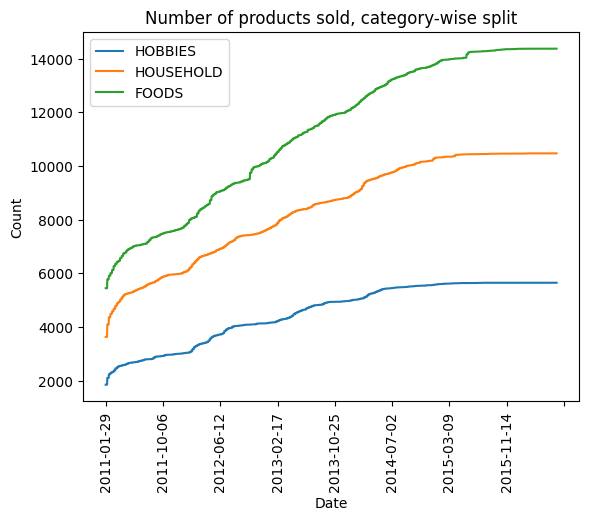

In [78]:
s0=30489-prices_train_val_eval.isna().sum()[5:]
s1=prices_train_val_eval[prices_train_val_eval.state_id=='CA'].shape[0]-prices_train_val_eval[prices_train_val_eval.state_id=='CA'].isna().sum()[5:]
s2=prices_train_val_eval[prices_train_val_eval.state_id=='TX'].shape[0]-prices_train_val_eval[prices_train_val_eval.state_id=='TX'].isna().sum()[5:]
s3=prices_train_val_eval[prices_train_val_eval.state_id=='WI'].shape[0]-prices_train_val_eval[prices_train_val_eval.state_id=='WI'].isna().sum()[5:]

data = {
    'Total':s0,
    'CA': s1,
    'TX': s2,
    'WI': s3
}
df=pd.concat(data,axis=1)

ax=df.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title(f'Number of products sold, total and state-wise split')
ax.tick_params(axis='x', rotation=90)




s1=prices_train_val_eval[prices_train_val_eval.cat_id=='HOBBIES'].shape[0]-prices_train_val_eval[prices_train_val_eval.cat_id=='HOBBIES'].isna().sum()[5:]
s2=prices_train_val_eval[prices_train_val_eval.cat_id=='HOUSEHOLD'].shape[0]-prices_train_val_eval[prices_train_val_eval.cat_id=='HOUSEHOLD'].isna().sum()[5:]
s3=prices_train_val_eval[prices_train_val_eval.cat_id=='FOODS'].shape[0]-prices_train_val_eval[prices_train_val_eval.cat_id=='FOODS'].isna().sum()[5:]

data = {
    'HOBBIES': s1,
    'HOUSEHOLD': s2,
    'FOODS': s3
}
df=pd.concat(data,axis=1)

ax=df.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title(f'Number of products sold, category-wise split')
ax.tick_params(axis='x', rotation=90)

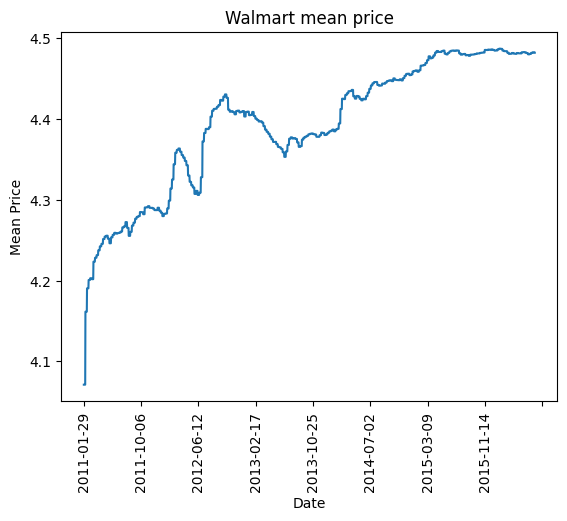

In [17]:
total_mean_price=prices_train_val_eval.mean(axis=0, numeric_only=True)[3:]
ax=total_mean_price.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Mean Price')
ax.set_title(f'Walmart mean price')
ax.tick_params(axis='x', rotation=90)


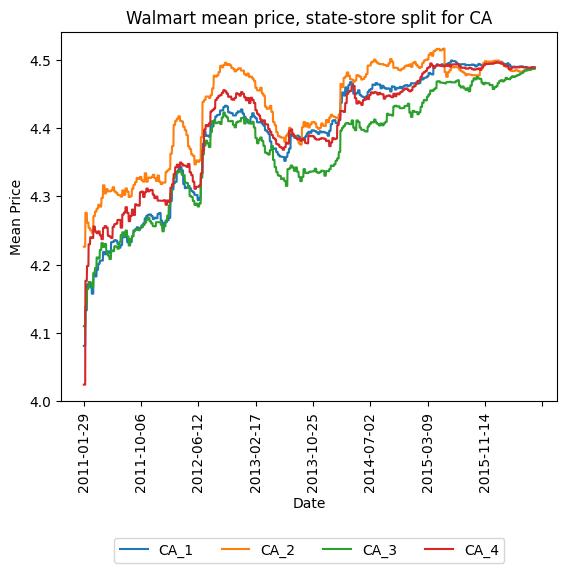

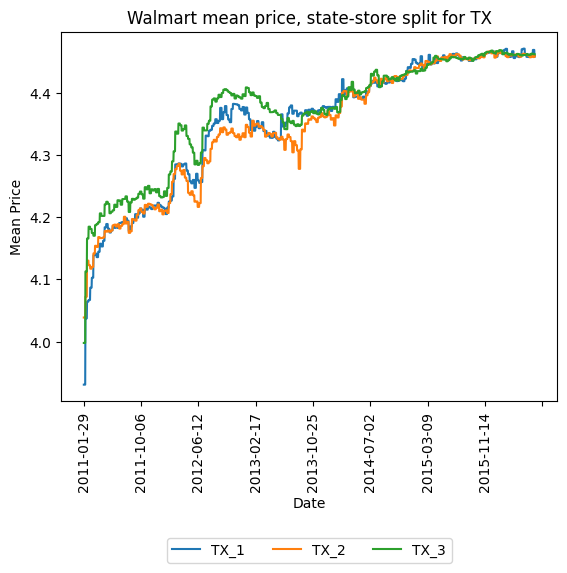

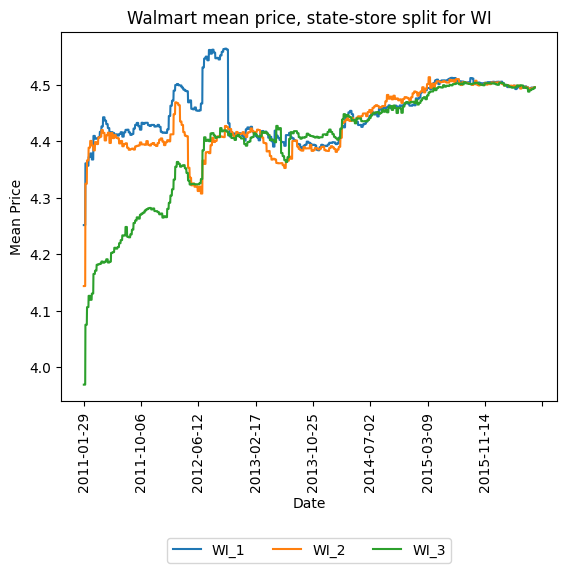

In [55]:
import matplotlib.pyplot as plt

# Filter for each state and plot
states = ['CA', 'TX', 'WI']

for state in states:
    # Filter for the specific state
    df_state = prices_train_val_eval[prices_train_val_eval['state_id'] == state].groupby(['state_id', 'store_id']).mean(numeric_only=True).reset_index()
    
    # Create a 'state_store' column
    df_state['state_store'] = df_state['state_id'] + "_" + df_state['store_id'].astype(str)
    
    # Drop unnecessary columns
    df_state.drop(columns=['state_id', 'store_id', 'dept_id', 'item_id'], inplace=True)
    
    # Set index to 'state_store'
    df_state = df_state.set_index('state_store')
    
    # Create the plot
    ax = df_state.T.plot()
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean Price')
    ax.set_title(f'Walmart mean price, state-store split for {state}')
    
    # Place the legend below the plot, horizontally aligned
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=len(df_state.columns))
    
    ax.tick_params(axis='x', rotation=90)
    
    # Show the plot for each state
    plt.show()


C:\Users\31683\AppData\Local\Temp\ipykernel_5888\2792505258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category['state_store'] = df_category['state_id'] + "_" + df_category['store_id'].astype(str)
C:\Users\31683\AppData\Local\Temp\ipykernel_5888\2792505258.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category.drop(columns=['state_id', 'store_id', 'dept_id', 'item_id', 'cat_id'], inplace=True)


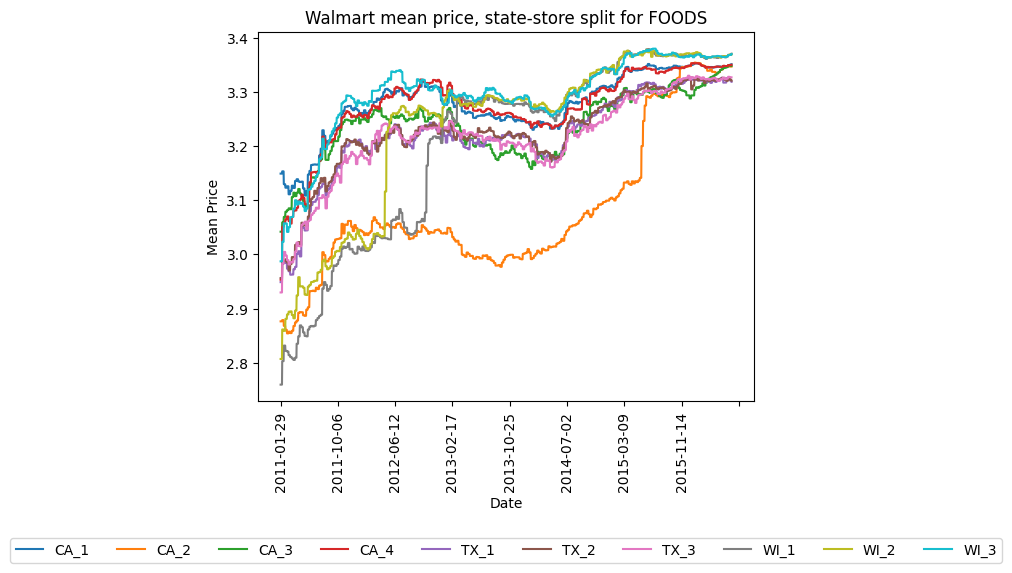

C:\Users\31683\AppData\Local\Temp\ipykernel_5888\2792505258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category['state_store'] = df_category['state_id'] + "_" + df_category['store_id'].astype(str)
C:\Users\31683\AppData\Local\Temp\ipykernel_5888\2792505258.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category.drop(columns=['state_id', 'store_id', 'dept_id', 'item_id', 'cat_id'], inplace=True)


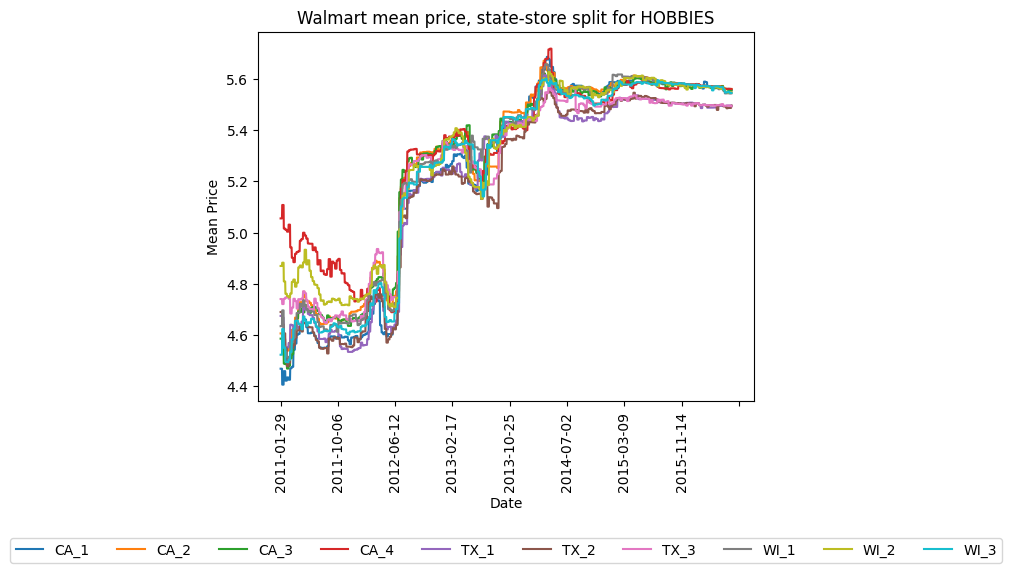

C:\Users\31683\AppData\Local\Temp\ipykernel_5888\2792505258.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category['state_store'] = df_category['state_id'] + "_" + df_category['store_id'].astype(str)
C:\Users\31683\AppData\Local\Temp\ipykernel_5888\2792505258.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category.drop(columns=['state_id', 'store_id', 'dept_id', 'item_id', 'cat_id'], inplace=True)


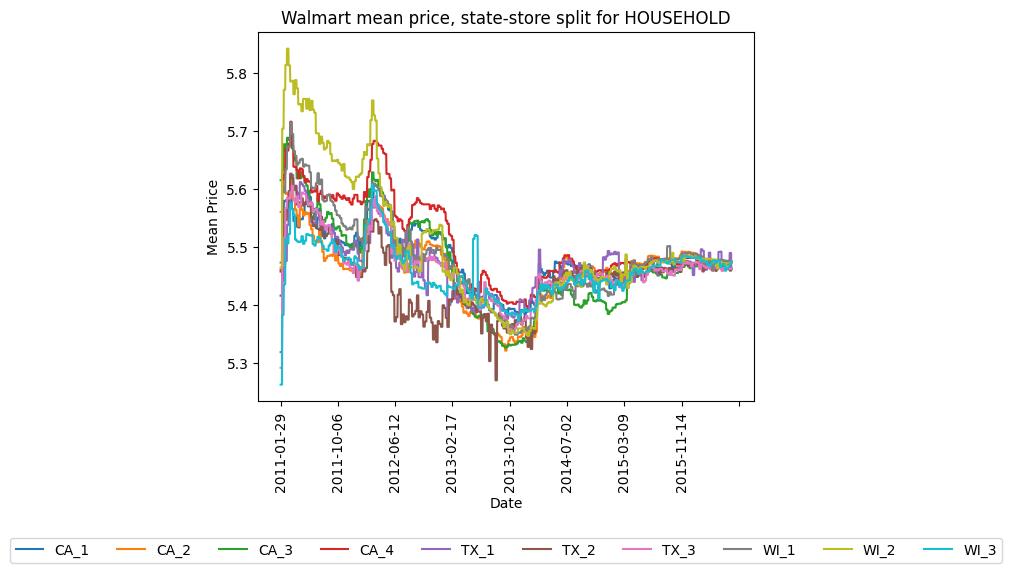

In [58]:

df = prices_train_val_eval.groupby(['state_id', 'store_id', 'cat_id']).mean(numeric_only=True).reset_index()

for cat in ['FOODS', 'HOBBIES', 'HOUSEHOLD']:
    # Filter the data for the specific category
    df_category = df[df["cat_id"] == cat]
    
    # Create a 'state_store' column
    df_category['state_store'] = df_category['state_id'] + "_" + df_category['store_id'].astype(str)
    
    # Drop unnecessary columns
    df_category.drop(columns=['state_id', 'store_id', 'dept_id', 'item_id', 'cat_id'], inplace=True)
    
    # Set index to 'state_store'
    df_category = df_category.set_index('state_store')
    
    # Create the plot
    ax = df_category.T.plot()
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean Price')
    ax.set_title(f'Walmart mean price, state-store split for {cat}')
    
    # Place the legend below the plot, horizontally aligned
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=len(df_category.columns))
    
    ax.tick_params(axis='x', rotation=90)
    
    # Show the plot for each category
    plt.show()


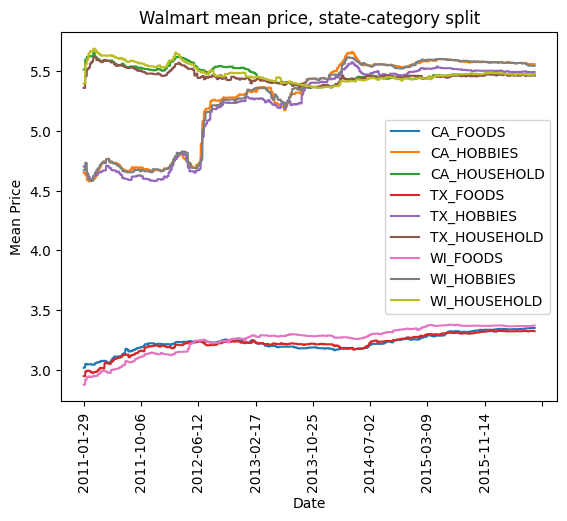

In [49]:
df=prices_train_val_eval.groupby(['state_id','cat_id']).mean(numeric_only=True).reset_index()
df['state_category']=df['state_id']+"_"+df['cat_id'].astype(str)
df.drop(columns=['state_id','store_id','dept_id','item_id','cat_id'],inplace=True)
df=df.set_index('state_category')
ax=df.T.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Mean Price')
ax.set_title(f'Walmart mean price, state-category split')
ax.legend()
ax.tick_params(axis='x', rotation=90)

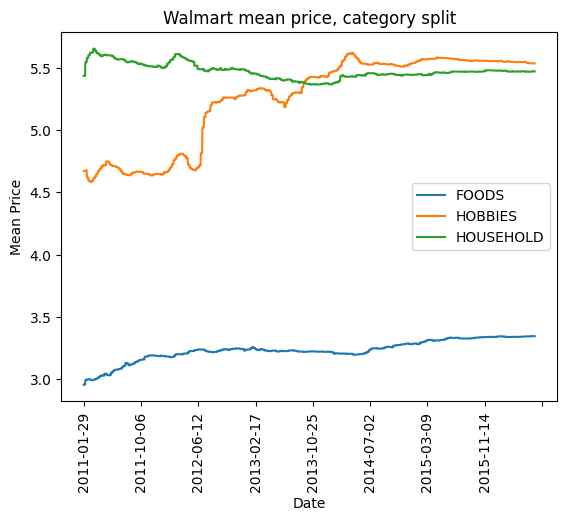

In [40]:
ax=prices_train_val_eval.groupby('cat_id').mean(numeric_only=True).iloc[:,3:].T.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Mean Price')
ax.set_title(f'Walmart mean price, category split')
ax.legend()
ax.tick_params(axis='x', rotation=90)

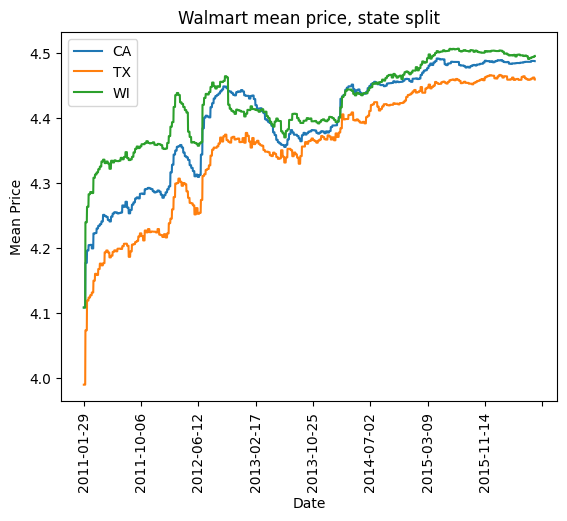

In [28]:
ax=prices_train_val_eval.groupby('state_id').mean(numeric_only=True).iloc[:,3:].T.plot()
ax.set_xlabel('Date')
ax.set_ylabel('Mean Price')
ax.set_title(f'Walmart mean price, state split')
ax.legend()
ax.tick_params(axis='x', rotation=90)